[**Demo %s**](#demo-minrescg-indefinite)

The following matrix is indefinite.

In [2]:
A = (11 / pi)^2 * gallery('poisson', 10);
A = A - 20 * eye(100);
lambda = eig(full(A));
isneg = lambda < 0;
disp(sprintf("%d negative and %d positive eigenvalues", sum(isneg), sum(~isneg)))

13 negative and 87 positive eigenvalues


We can compute the relevant quantities from {numref}`Theorem {number} <theorem-minrescg-indefinite>`.

In [3]:
m = min(-lambda(isneg));
M = max(-lambda(isneg));
kappa_minus = M / m;
m = min(lambda(~isneg));
M = max(lambda(~isneg));
kappa_plus = M / m;
S = sqrt(kappa_minus * kappa_plus);
rho = sqrt((S - 1) / (S + 1));
fprintf("convergence rate: %.3f", rho)

convergence rate: 0.950

Because the iteration number $m$ is halved in {eq}`minres-conv`, the rate constant of linear convergence is the square root of this number, which makes it even closer to 1.

Now we apply MINRES to a linear system with this matrix, and compare the observed convergence to the upper bound from the theorem.

```{index} ! MATLAB; minres
```

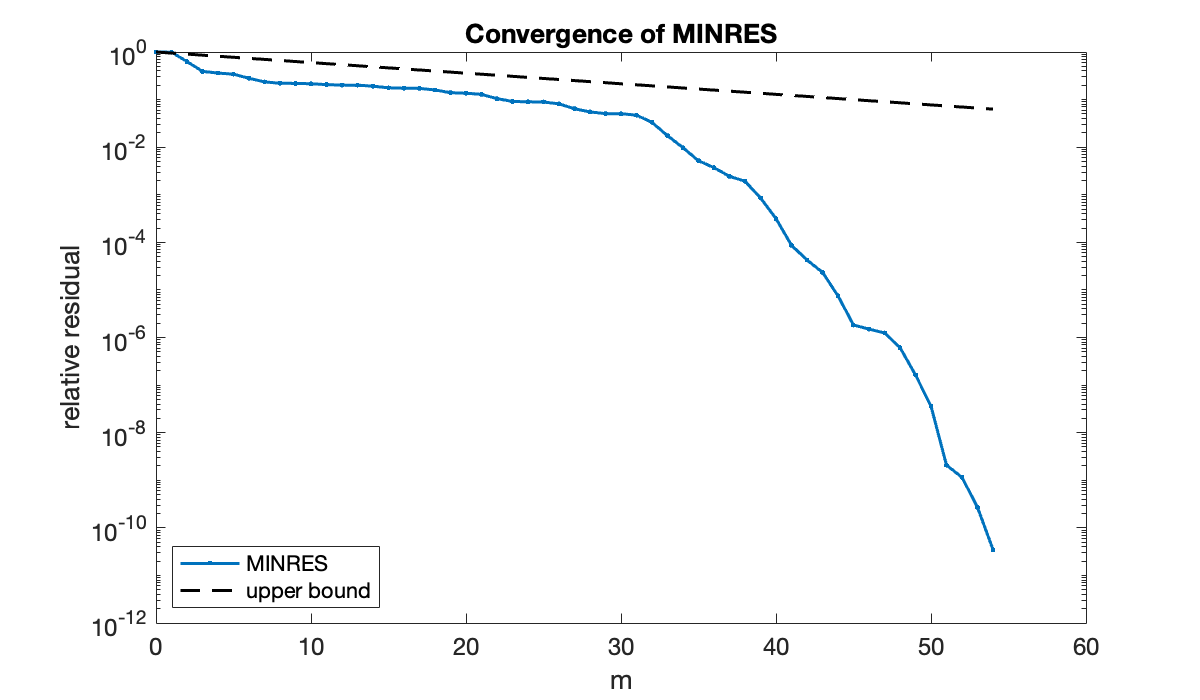

In [4]:
b = rand(100, 1);
[xMR, ~,~ , ~, residMR] = minres(A, b, 1e-10, 100);
relres = residMR / norm(b);
m = 0:length(relres) - 1;
clf,  semilogy(m, relres, '.-')
hold on
semilogy(m, rho .^ m, 'k--')
xlabel('m'),  ylabel('relative residual') 
title('Convergence of MINRES') 
legend('MINRES', 'upper bound', 'location', 'southwest');

The upper bound turns out to be pessimistic here, especially in the later iterations. However, you can see a slow linear phase in the convergence that tracks the bound closely.